In [1]:
"""
    Rodrigo Schardong
    
    Hough Transform
"""

import cv2
import numpy as np
import random
from Hough_Class import Hough_Functions
hf = Hough_Functions()

#Libs Just to Display
from matplotlib import pyplot as plt
from matplotlib import figure
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def CreateImage(height, width, inlines, outlines):
    image = np.zeros((height, width))
    while(inlines > 0):
        i = random.randint(0, height - 1)
        if(image[i,i] == 0):
            image[i,i] = 255
            inlines -= 1
    while(outlines > 0):
        x = random.randint(0, width - 1)
        y = random.randint(0, height - 1)
        if(x != y):
            if(image[y, x] == 0):
                image[y, x] = 255
                outlines -= 1
    return image

def main(inlines, outlines, threshold):
    image = CreateImage(10, 10, inlines, outlines)
    
    hf.PlotHoughSins(image)
    filtered = hf.HoughLineFilter(image,threshold)
    hf.PlotHoughSins(filtered)
    
    
interact(main,
         #image_name = [("Cross", 'cross'),('Lizard', 'lizard.jpg'),('Ilusion', 'ilusion.jpg'),('Lena','Lena_c.png'),('Colour Wheel',"colour.jpg"),('Gato', 'cat.png'), ('Rodrigo', 'Rodrigo.jpg')],
         inlines = widgets.IntSlider(description = 'Line Dots', value = 2, min = 1, max = 10),
         outlines= widgets.IntSlider(description = 'Noise', value = 0, min = 0, max = 50),
         threshold = widgets.IntSlider(description = 'Thresh', value = 2, min = 2, max = 10))

interactive(children=(IntSlider(value=2, description='Line Dots', max=10, min=1), IntSlider(value=0, descripti…

<function __main__.main(inlines, outlines, threshold)>

In [5]:
"""
    Rodrigo Schardong
    
    Hough Transform Filter
"""

import cv2
import numpy as np
import random
from Hough_Class import Hough_Functions
hf = Hough_Functions()
from Filters_Class import Filter_Functions
ff = Filter_Functions()

#Libs Just to Display
from matplotlib import pyplot as plt
from matplotlib import figure
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets



def main(image_name, threshold, deviation, binThreshold):
    image = cv2.imread(image_name, 0)
    
    blur = cv2.GaussianBlur(image,(5,5),0)
    #ret, binOtsu = cv2.threshold(blur,0, 255 ,cv2.THRESH_BINARY+ cv2.THRESH_OTSU)
    sobel = ff.Sobel(image)
    #ret, output = cv2.threshold(sobel, 127, 255 ,cv2.THRESH_BINARY+ cv2.THRESH_OTSU)
    
    hf.PlotHoughSins(sobel, binThreshold)
    filtered = hf.HoughLineFilter(sobel,threshold, binThreshold, deviation)
    hf.PlotHoughSins(filtered, binThreshold)
    
interact(main,
         image_name = [("road", 'road.jpg'),("sp", 'sp.png'),('Lizard', 'lizard.jpg'),('Ilusion', 'ilusion.jpg'),('Lena','Lena_c.png'),('Colour Wheel',"colour.jpg"),('Gato', 'cat.png'), ('Rodrigo', 'Rodrigo.jpg')],
         threshold = widgets.IntSlider(description = 'L Thresh', value = 30, min = 2, max = 100),
         deviation = widgets.FloatSlider(description = 'Deviation', value = 0.3, min = 0, max = 1, step = 0.1),
         binThreshold = widgets.IntSlider(description = 'Bin Thresh', value = 200, min = 0, max = 255))

interactive(children=(Dropdown(description='image_name', options=(('road', 'road.jpg'), ('sp', 'sp.png'), ('Li…

<function __main__.main(image_name, threshold, deviation, binThreshold)>

In [6]:
"""
    Rodrigo Schardong
    
    Hough Transform Lines 
"""

import cv2
import numpy as np
import random
from Hough_Class import Hough_Functions
hf = Hough_Functions()
from Filters_Class import Filter_Functions
ff = Filter_Functions()

#Libs Just to Display
from matplotlib import pyplot as plt
from matplotlib import figure
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets



def main(image_name, threshold, deviation, binThreshold):
    
    
    image = cv2.imread(image_name, 0)
    f,a = plt.subplots(ncols = 3, figsize = (20,5))
    a[0].imshow(image, cmap='gray')
    a[0].set_title('Image')
    #blur = cv2.GaussianBlur(image,(5,5),0)
    #a[1].imshow(blur, cmap='gray')
    #a[1].set_title('Blur')
    #ret, binOtsu = cv2.threshold(blur,0, 255 ,cv2.THRESH_BINARY+ cv2.THRESH_OTSU)
    sobel = ff.Sobel(image)
    a[1].imshow(sobel, cmap='gray')
    a[1].set_title('Sobel')
    #ret, output = cv2.threshold(sobel, 127, 255 ,cv2.THRESH_BINARY+ cv2.THRESH_OTSU)
    for y in range(sobel.shape[0]):
        for x in range(sobel.shape[1]):
            if(sobel[y,x] >= binThreshold):
                sobel[y,x] = 255
            else:
                sobel[y,x] = 0
    a[2].imshow(sobel, cmap='gray')
    a[2].set_title('Binarized')
    plt.show()
    hf.PlotHoughSins(sobel, binThreshold)
    filtered = hf.HoughLinesTransform(sobel,threshold, binThreshold, deviation)
    hf.PlotHoughSins(filtered, binThreshold)
    
    rgb = cv2.imread(image_name)
    b, g, r = cv2.split(rgb)
    for y in range(r.shape[0]):
        for x in range(r.shape[1]):
            if(filtered[y,x] == 255):
                r[y,x] = 255
                g[y,x] = 0
                b[y,x] = 0
    rgb = cv2.merge((r, g, b))
    plt.imshow(rgb)
    plt.show()
    
interact(main,
         image_name = [("road", 'road.jpg'),("sp", 'sp.png'),('Lizard', 'lizard.jpg'),('Ilusion', 'ilusion.jpg'),('Lena','Lena_c.png'),('Colour Wheel',"colour.jpg"),('Gato', 'cat.png'), ('Rodrigo', 'Rodrigo.jpg')],
         threshold = widgets.IntSlider(description = 'L Thresh', value = 30, min = 2, max = 100),
         deviation = widgets.FloatSlider(description = 'Deviation', value = 0.3, min = 0, max = 1, step = 0.1),
         binThreshold = widgets.IntSlider(description = 'Bin Thresh', value = 200, min = 0, max = 255))

interactive(children=(Dropdown(description='image_name', options=(('road', 'road.jpg'), ('sp', 'sp.png'), ('Li…

<function __main__.main(image_name, threshold, deviation, binThreshold)>

In [1]:
"""
    Rodrigo Schardong
    
    Hough CircleTransform
"""

import cv2
import numpy as np
import random
from Hough_Class import Hough_Functions
hf = Hough_Functions()

#Libs Just to Display
from matplotlib import pyplot as plt
from matplotlib import figure
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def CreateImage(height, width, inlines, outlines):
    image = np.zeros((height, width))
    """
    while(inlines > 0):
        x = random.randint(0, width - 1)
        y = random.randint(0, height - 1)
        radius = random.randint(2, 10)
        image = cv2.circle(image, (y, x), radius, 255, 1)
        inlines -= 1
    """
    y = int(height / 2)
    x = int(width / 2)
    centers = []
    centers.append([y, x, inlines])
    image = hf.CreateCircles(image,centers)
    """
    image = cv2.circle(image, (y, x), inlines, 255, 1)
    while(outlines > 0):
        x = random.randint(0, width - 1)
        y = random.randint(0, height - 1)
        if(x != y):
            if(image[y, x] == 0):
                image[y, x] = 255
                outlines -= 1
    """
    
    return image

def main(radius, outlines, threshold, minRadius, maxRadius):
    image_name = "laranja.jpg"
    #image = cv2.imread(image_name, 0)
    image = CreateImage(25, 25, radius, outlines)
    
    plt.imshow(image, cmap = 'gray')
    plt.show()
    
    minMaxRadius = [minRadius, maxRadius]
    circles = hf.HoughCirclesTransform(image, threshold, minMaxRadius)

    
interact(main,
         #image_name = [("Cross", 'cross'),('Lizard', 'lizard.jpg'),('Ilusion', 'ilusion.jpg'),('Lena','Lena_c.png'),('Colour Wheel',"colour.jpg"),('Gato', 'cat.png'), ('Rodrigo', 'Rodrigo.jpg')],
         radius = widgets.IntSlider(description = 'Radius', value = 4, min = 1, max = 10),
         outlines= widgets.IntSlider(description = 'Noise', value = 0, min = 0, max = 50),
         threshold = widgets.IntSlider(description = 'Thresh', value = 90, min = 1, max = 100),
         minRadius = widgets.IntSlider(description = 'Min R %', value = 10, min = 1, max = 100),
         maxRadius = widgets.IntSlider(description = 'Max R %', value = 40, min = 1, max = 100))

interactive(children=(IntSlider(value=4, description='Radius', max=10, min=1), IntSlider(value=0, description=…

<function __main__.main(radius, outlines, threshold, minRadius, maxRadius)>

gray


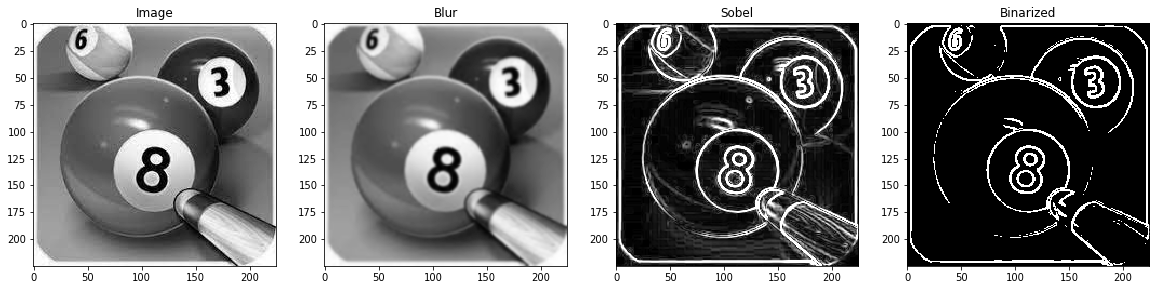

red


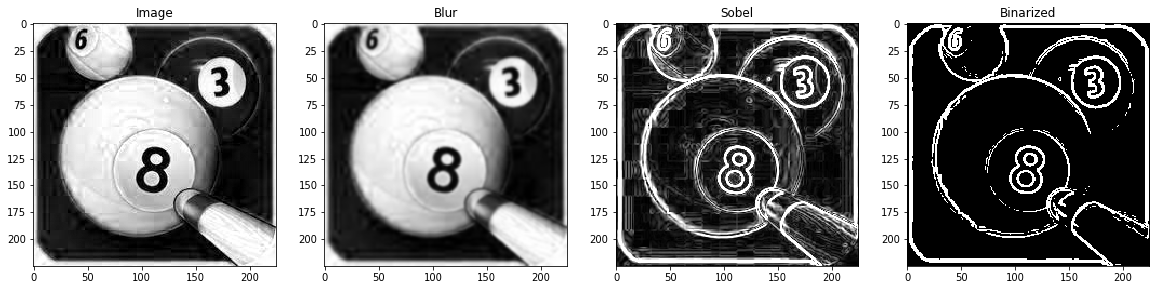

green


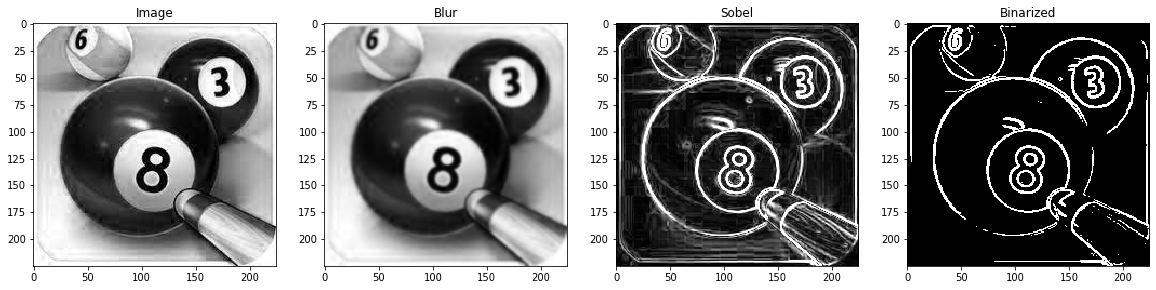

blue


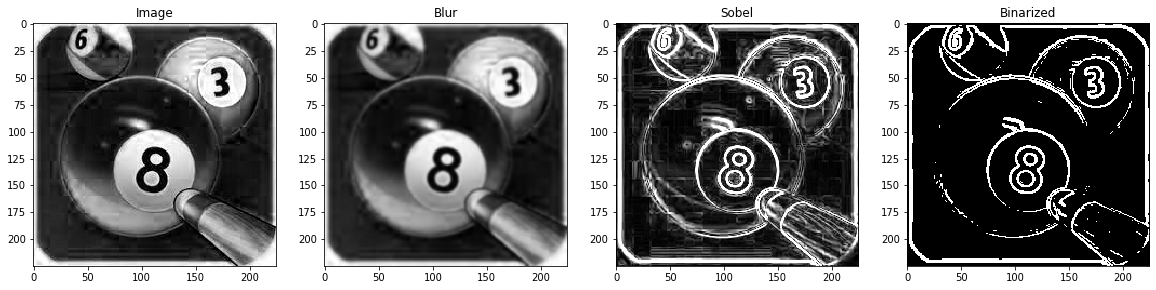

In [3]:
import cv2
import numpy as np
from Filters_Class import Filter_Functions
ff = Filter_Functions()

def erode(image):
    output = np.zeros(image.shape)
    
    return output
def imgplot(image):
    f,a = plt.subplots(ncols = 4, figsize = (20,5))
    a[0].imshow(image, cmap='gray')
    a[0].set_title('Image')
    blur = cv2.GaussianBlur(image,(5,5),0)
    a[1].imshow(blur, cmap='gray')
    a[1].set_title('Blur')
    #ret, binOtsu = cv2.threshold(blur,0, 255 ,cv2.THRESH_BINARY+ cv2.THRESH_OTSU)
    sobel = ff.Sobel(image)
    #sobel = cv2.Sobel(blur,cv2.CV_8U,1,0,ksize=5)
    a[2].imshow(sobel, cmap='gray')
    a[2].set_title('Sobel')
    #ret, output = cv2.threshold(sobel, 127, 255 ,cv2.THRESH_BINARY+ cv2.THRESH_OTSU)
    binarized = np.zeros(sobel.shape, dtype = int)
    for y in range(sobel.shape[0]):
        for x in range(sobel.shape[1]):
            if(sobel[y,x] >= binThreshold):
                binarized[y,x] = 255
            else:
                binarized[y,x] = 0
    a[3].imshow(binarized, cmap='gray')
    a[3].set_title('Binarized')
    plt.show()
binThreshold = 200
#image_name = "jugling.png"
image_name = "sinuca.jpg"
image = cv2.imread(image_name, 0)

print("gray")
imgplot(image)

bgr = cv2.imread(image_name)
b, g, r = cv2.split(bgr)

print("red")
imgplot(r)
print("green")
imgplot(g)
print("blue")
imgplot(b)






In [6]:
"""
    Rodrigo Schardong
    
    Hough CircleTransform
"""

import cv2
import numpy as np
import random
from Hough_Class import Hough_Functions
hf = Hough_Functions()

#Libs Just to Display
from matplotlib import pyplot as plt
from matplotlib import figure
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def imgplot(image):
    f,a = plt.subplots(ncols = 4, figsize = (20,5))
    a[0].imshow(image, cmap='gray')
    a[0].set_title('Image')
    blur = cv2.GaussianBlur(image,(5,5),0)
    a[1].imshow(blur, cmap='gray')
    a[1].set_title('Blur')
    #ret, binOtsu = cv2.threshold(blur,0, 255 ,cv2.THRESH_BINARY+ cv2.THRESH_OTSU)
    sobel = ff.Sobel(image)
    #sobel = cv2.Sobel(blur,cv2.CV_8U,1,0,ksize=5)
    a[2].imshow(sobel, cmap='gray')
    a[2].set_title('Sobel')
    #ret, output = cv2.threshold(sobel, 127, 255 ,cv2.THRESH_BINARY+ cv2.THRESH_OTSU)
    binarized = np.zeros(sobel.shape, dtype = int)
    binThreshold = 200
    for y in range(sobel.shape[0]):
        for x in range(sobel.shape[1]):
            if(sobel[y,x] >= binThreshold):
                binarized[y,x] = 255
            else:
                binarized[y,x] = 0
    a[3].imshow(binarized, cmap='gray')
    a[3].set_title('Binarized')
    plt.show()
    return binarized




def main(threshold, minRadius, maxRadius):
    #image_name = "jugling.png"
    image_name = "sinuca.jpg"
    image = cv2.imread(image_name, 0)

    print("gray")
    img = imgplot(image[20:200, 20:200])

    bgr = cv2.imread(image_name)
    b, g, r = cv2.split(bgr)

    #print("red")
    #imgR = imgplot(r)
    #print("green")
    #imgG = imgplot(g)
    #print("blue")
    #imgB =imgplot(b)
    
    #plt.imshow(image, cmap = 'gray')
    #plt.show()
    
    minMaxRadius = [minRadius, maxRadius]
    circles = hf.HoughCirclesTransform(img, threshold, minMaxRadius)

    
interact(main,
         #image_name = [("Cross", 'cross'),('Lizard', 'lizard.jpg'),('Ilusion', 'ilusion.jpg'),('Lena','Lena_c.png'),('Colour Wheel',"colour.jpg"),('Gato', 'cat.png'), ('Rodrigo', 'Rodrigo.jpg')],
         threshold = widgets.IntSlider(description = 'Thresh', value = 95, min = 1, max = 100),
         minRadius = widgets.IntSlider(description = 'Min R %', value = 60, min = 1, max = 100),
         maxRadius = widgets.IntSlider(description = 'Max R %', value = 90, min = 1, max = 100))

interactive(children=(IntSlider(value=95, description='Thresh', min=1), IntSlider(value=60, description='Min R…

<function __main__.main(threshold, minRadius, maxRadius)>

In [12]:
i = []
i.append([1,2,3])
print(i)
i.append([4,5,6])
print(i)
a = i[0]
print(a[2])
i.append([4,5,6])
i.append([1,2,3])
i.append([4,5,6])
i.append([4,5,2])
print("-----")
for j in i[:]:
    print(j)
    
print("_________")
b=set()
result=[element for element in i
    if not (tuple(element) in b
        or  b.add(tuple(element)))]
print((result))

[[1, 2, 3]]
[[1, 2, 3], [4, 5, 6]]
3
-----
[1, 2, 3]
[4, 5, 6]
[4, 5, 6]
[1, 2, 3]
[4, 5, 6]
[4, 5, 2]
_________
[[1, 2, 3], [4, 5, 6], [4, 5, 2]]


In [34]:
l = [1,2,4,8,12]
for j in l[:]:
    print(j)
    j += 1
print(l)
    
for j in range(1, len(l)):
    print(j)

1
2
4
8
12
[1, 2, 4, 8, 12]
1
2
3
4


In [33]:
l = []
for j in l[:]:
    print ("hey")
flag = False
if(not(flag)):
    print("hey")

hey


a = [1,2]
b = [0,2]
c = a - b
print(c)

In [35]:
a = [1,2]
b = [0,2]
c = a -b
print(c)

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [36]:
import numpy as np

angle = np.arange(0,361, 90)

for a in angle[:]:
    print(a)

0
90
180
270
360


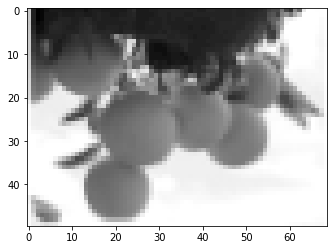

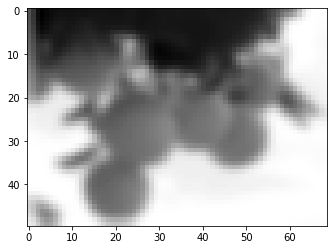

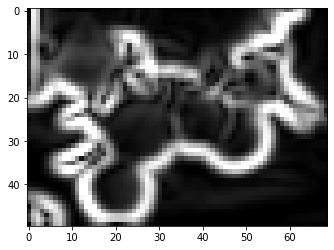

In [35]:
image_name = "laranja.png"
image = cv2.imread(image_name, 0)
plt.imshow(image, cmap = "gray")
plt.show()
#blur = cv2.GaussianBlur(image,(5,5),0)
#blur = cv2.GaussianBlur(blur,(5,5),0)
#blur = cv2.GaussianBlur(blur,(5,5),0)
plt.imshow(blur, cmap = "gray")
plt.show()

sobel = ff.Sobel(blur)
plt.imshow(sobel, cmap = "gray")
plt.show()